# importing libraries and packages

In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline


# Reading our dataset

In [2]:
retail_initial = pd.read_csv('online_retail.csv')


In [3]:
retail_initial

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


# Exploratory Data Analysis

In [4]:
retail_initial.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
retail_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
retail_initial.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [7]:
print('number of rows :\n',retail_initial.count())

number of rows :
 InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64


In [8]:
print('dimensions:',retail_initial.shape)

dimensions: (541909, 8)


In [9]:
retail_initial.info()
#info shows us memory requirements

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
retail_initial['InvoiceDate'] = pd.to_datetime(retail_initial['InvoiceDate'])
retail_initial['InvoiceDate']

0        2010-01-12 08:26:00
1        2010-01-12 08:26:00
2        2010-01-12 08:26:00
3        2010-01-12 08:26:00
4        2010-01-12 08:26:00
                 ...        
541904   2011-09-12 12:50:00
541905   2011-09-12 12:50:00
541906   2011-09-12 12:50:00
541907   2011-09-12 12:50:00
541908   2011-09-12 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

# finding null values

In [11]:
retail_initial.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
## We can see here that the description and customerID values have null values.
##let us look into these columns to understand the category of missing data

In [13]:
retail_initial['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

# cleaning our data

In [14]:
#Removing empty spaces in the descriptions.
retail_initial['Description'] = retail_initial['Description'].str.strip()
retail_initial

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


In [15]:
retail_initial.dropna(axis = 0, subset= 'InvoiceNo',inplace = True)
#Converting the InvoiceNo to a String
retail_initial['InvoiceNo'] = retail_initial['InvoiceNo'].astype(str)
#Dropping rows in InvoiceNo which contains ‘C’ as it denotes a Cancelled order
retail_initial

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


In [16]:
##4372 data entries are not mapped to any customer, thus lack ID, we shall delete them as they are useless

In [17]:
retail_initial.dropna(axis=0,subset = 'CustomerID',inplace = True)
retail_initial

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


In [18]:
retail_initial.shape

(406829, 8)

In [19]:
### the data entries have been reduced to 4,06,829
###further let us remove the duplicate values

In [20]:
print('Duplicate data entries removed: {}'.format(retail_initial.duplicated().sum()))
retail_initial.drop_duplicates(inplace = True)

Duplicate data entries removed: 5225


In [21]:
retail_initial.shape

(401604, 8)

# correlation between values 

<AxesSubplot:>

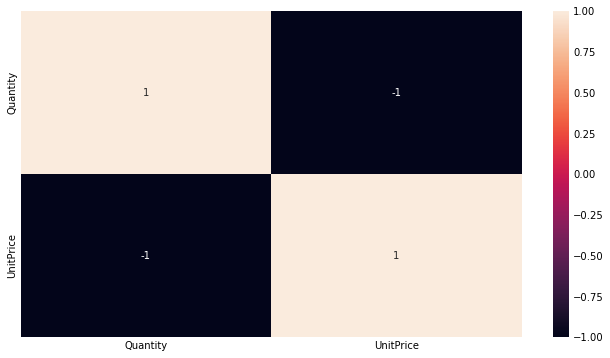

In [22]:
plt.figure(figsize = (10,6))
corr_matrix = retail_initial[['Quantity', 'UnitPrice']].corr()
sns.heatmap(corr_matrix.corr(),annot=True)

In [23]:
#from the heatmap we find that,
#quantity is innversely dependent on unitprice as correlation is negative

# Feature engineering
Feature engineering is the process of transforming raw data into features that are suitable for machine learning models.

In [24]:
#let us check if dataset is balanced or imbalanced

In [25]:
retail_initial.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [26]:
countries = pd.Series(retail_initial['Country'].unique())

In [27]:
orders_per_country = retail_initial[['CustomerID','Country']].groupby(['Country']).count()
orders_per_country.reset_index(drop = False)
orders_per_country = orders_per_country.sort_values(by='CustomerID', ascending=False)
orders_per_country 

,CustomerID
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


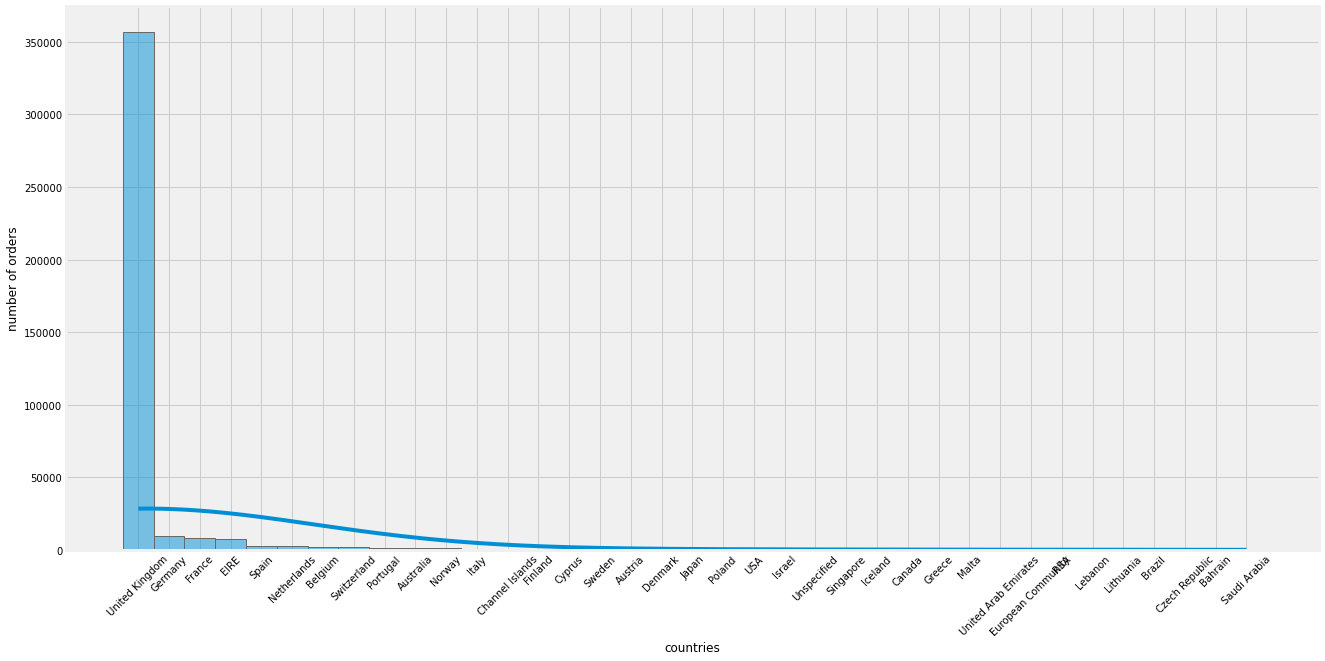

In [28]:
plt.figure(figsize=(20,10))
plt.xlabel('countries')
plt.ylabel('number of orders')
sns.histplot(data=orders_per_country, 
             x='Country', 
             weights='CustomerID', 
             bins=len(orders_per_country), 
             kde=True)
plt.xticks(rotation=45) 
plt.show()

In [29]:
#what we can observe is:
#there is kernal density overlay- most countries
#the graph is right-skewed:
#indicating that most countries have fewer orders while a small number have significantly higher counts (upscaling reqd)
#Outliers: There may be extreme outliers


# products and customers analysis

In [30]:
#sns.pairplot(retail_initial)

In [31]:
#product and transactions analysis

In [32]:
product_details = pd.DataFrame({'products' : len(retail_initial['StockCode'].value_counts()),
                               'Transactions': len(retail_initial['InvoiceNo'].value_counts()),
                               'Customers' : len(retail_initial['CustomerID'].value_counts())}, index = ['Quantity'])
product_details

,products,Transactions,Customers
Quantity,3684,22190,4372


In [33]:
##there are 3684 different products which 4372 customers have purchased over 22k transactions
##let us find number of products purchased per customer visit

In [34]:
products_per_purchase= retail_initial.groupby(by = ['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
products_per_purchase=products_per_purchase.rename(columns= {'InvoiceDate' : 'number of products'})
products_per_purchase.sort_values('number of products')


,CustomerID,InvoiceNo,number of products
0,12346.0,541431,1
12809,15615.0,C554874,1
12808,15615.0,C550454,1
12799,15615.0,562919,1
12791,15615.0,550450,1
...,...,...,...
6808,14096.0,573576,435
6811,14096.0,578270,442
6813,14096.0,580727,529
6812,14096.0,579196,533


In [35]:
#some customers are frequent visitors, with large number of products purchased (example: customer #6810)
#some customers have bought 1-2 products (example : customer #12809)

In [36]:
retail_cleaned = retail_initial.copy(deep = True)
retail_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  retail_initial.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    retail_test = retail_initial[(retail_initial['CustomerID'] == col['CustomerID']) &
                         (retail_initial['StockCode']  == col['StockCode']) & 
                         (retail_initial['InvoiceDate'] < col['InvoiceDate']) & 
                         (retail_initial['Quantity']   > 0)].copy()

    # Cancelation WITHOUT counterpart
    if (retail_test.shape[0] == 0): 
        doubtfull_entry.append(index)
   
    # Cancelation WITH a counterpart
    elif (retail_test.shape[0] == 1): 
        index_order = retail_test.index[0]
        retail_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
   
    # Various counterparts exist in orders: we delete the last one
    elif (retail_test.shape[0] > 1): 
        retail_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in retail_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            retail_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break            

In [37]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 6197
doubtfull_entry: 2558


In [38]:
#this code shows us that there are 6197+2558 =  entries to remove
#entry_to_remove: 6197
#doubtfull_entry: 2558

In [39]:
#let us analyse the stockcode column
retail_initial['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [40]:
##we see that some values contain specific letters - A,B,C,D,etc
#we will map these letters to their meaning

In [41]:
retail_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
retail_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = retail_cleaned[(retail_cleaned['Quantity'] < 0) & (retail_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358.0,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659.0,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-07-03 13:49:00,1.65,14048.0,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754.0,United Kingdom,0
197417,C553904,22897,OVEN MITT APPLES DESIGN,-11,2011-05-19 18:10:00,1.45,13081.0,United Kingdom,0


In [42]:
list_special_codes = retail_cleaned[retail_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [43]:
for code in list_special_codes:
    print("{} -> {}".format(code,retail_cleaned[retail_cleaned['StockCode'] == code]['Description'].unique()[0]))

POST -> POSTAGE
D -> Discount
C2 -> CARRIAGE
M -> Manual
BANK CHARGES -> Bank Charges
PADS -> PADS TO MATCH ALL CUSHIONS
DOT -> DOTCOM POSTAGE


In [44]:
# now, we can create the basket data for transactions 
#The basket will contain the Qty of each items bought per transaction.
basket = retail_cleaned[retail_cleaned['Country']=='France'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.tail()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Remove items with low frequency
item_counts = basket.sum(axis=0)
frequent_items = item_counts[item_counts >= 5].index
basket_reduced = basket[frequent_items]


# Data Encoding

In [46]:
# we will use OneHotCoding technique to get the data ready to feed to the model
# we choose this technique because- nominal data

In [47]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1
    
basket_encoded = basket.applymap(encode)



# Applying the apriori algorithm

In [48]:
frequent_items = apriori(basket_encoded,min_support=0.07,use_colnames=True)


In [49]:
frequent_items

,support,itemsets
0,0.071979,(4 TRADITIONAL SPINNING TOPS)
1,0.097686,(ALARM CLOCK BAKELIKE GREEN)
2,0.102828,(ALARM CLOCK BAKELIKE PINK)
3,0.095116,(ALARM CLOCK BAKELIKE RED)
4,0.077121,(BAKING SET 9 PIECE RETROSPOT)
...,...,...
85,0.084833,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED..."
86,0.084833,"(SET/20 RED RETROSPOT PAPER NAPKINS, POSTAGE, ..."
87,0.102828,"(SET/6 RED SPOTTY PAPER CUPS, POSTAGE, SET/6 R..."
88,0.100257,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED..."


# Association Rules

In [50]:
assoc_rules = pd.DataFrame(association_rules(frequent_items,metric="lift",min_threshold=1,num_itemsets=0))
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102828,0.097686,0.074550,0.725000,7.421711,1.0,0.064505,3.281140,0.964430,0.591837,0.695228,0.744079
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.097686,0.102828,0.074550,0.763158,7.421711,1.0,0.064505,3.788061,0.958935,0.591837,0.736013,0.744079
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.097686,0.095116,0.079692,0.815789,8.576814,1.0,0.070400,4.912229,0.979046,0.704545,0.796426,0.826814
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.095116,0.097686,0.079692,0.837838,8.576814,1.0,0.070400,5.564267,0.976265,0.704545,0.820282,0.826814
4,(ALARM CLOCK BAKELIKE GREEN),(POSTAGE),0.097686,0.771208,0.084833,0.868421,1.126053,1.0,0.009496,1.738817,0.124061,0.108197,0.424897,0.489211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES)","(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",0.107969,0.102828,0.082262,0.761905,7.409524,1.0,0.071160,3.768123,0.969741,0.640000,0.734616,0.780952
134,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER CUPS, POSTAGE, SET/6 R...",0.133676,0.102828,0.082262,0.615385,5.984615,1.0,0.068517,2.332648,0.961424,0.533333,0.571303,0.707692
135,(SET/6 RED SPOTTY PAPER CUPS),"(SET/20 RED RETROSPOT PAPER NAPKINS, POSTAGE, ...",0.138817,0.084833,0.082262,0.592593,6.985410,1.0,0.070486,2.246319,0.994963,0.581818,0.554827,0.781145
136,(POSTAGE),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",0.771208,0.100257,0.082262,0.106667,1.063932,1.0,0.004943,1.007175,0.262640,0.104235,0.007124,0.463590


# Filtering the rules

In [51]:
filtered_assoc_rules= pd.DataFrame([(assoc_rules['lift']>=6) & (assoc_rules['confidence']>=0.8)])

In [52]:
filtered_assoc_rules

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#We can understand the accuracy using the following lift vs confidence graph

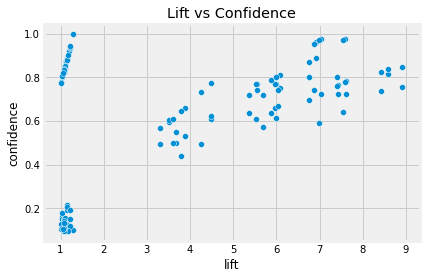

In [54]:
sns.scatterplot(x='lift', y='confidence', data=assoc_rules)
plt.title('Lift vs Confidence')
plt.show()

In [55]:
# Sort the rules by lift and show the top 10
top_rules = assoc_rules.sort_values('lift', ascending=False).head(10)
print(top_rules[['antecedents', 'consequents', 'lift']])


                                           antecedents  \
79                          (ALARM CLOCK BAKELIKE RED)   
78               (ALARM CLOCK BAKELIKE GREEN, POSTAGE)   
3                           (ALARM CLOCK BAKELIKE RED)   
2                         (ALARM CLOCK BAKELIKE GREEN)   
80                        (ALARM CLOCK BAKELIKE GREEN)   
77                 (ALARM CLOCK BAKELIKE RED, POSTAGE)   
6                          (ALARM CLOCK BAKELIKE PINK)   
7                           (ALARM CLOCK BAKELIKE RED)   
118  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
123                    (SET/6 RED SPOTTY PAPER PLATES)   

                                           consequents      lift  
79               (ALARM CLOCK BAKELIKE GREEN, POSTAGE)  8.920557  
78                          (ALARM CLOCK BAKELIKE RED)  8.920557  
3                         (ALARM CLOCK BAKELIKE GREEN)  8.576814  
2                           (ALARM CLOCK BAKELIKE RED)  8.576814  
80                 (ALARM 

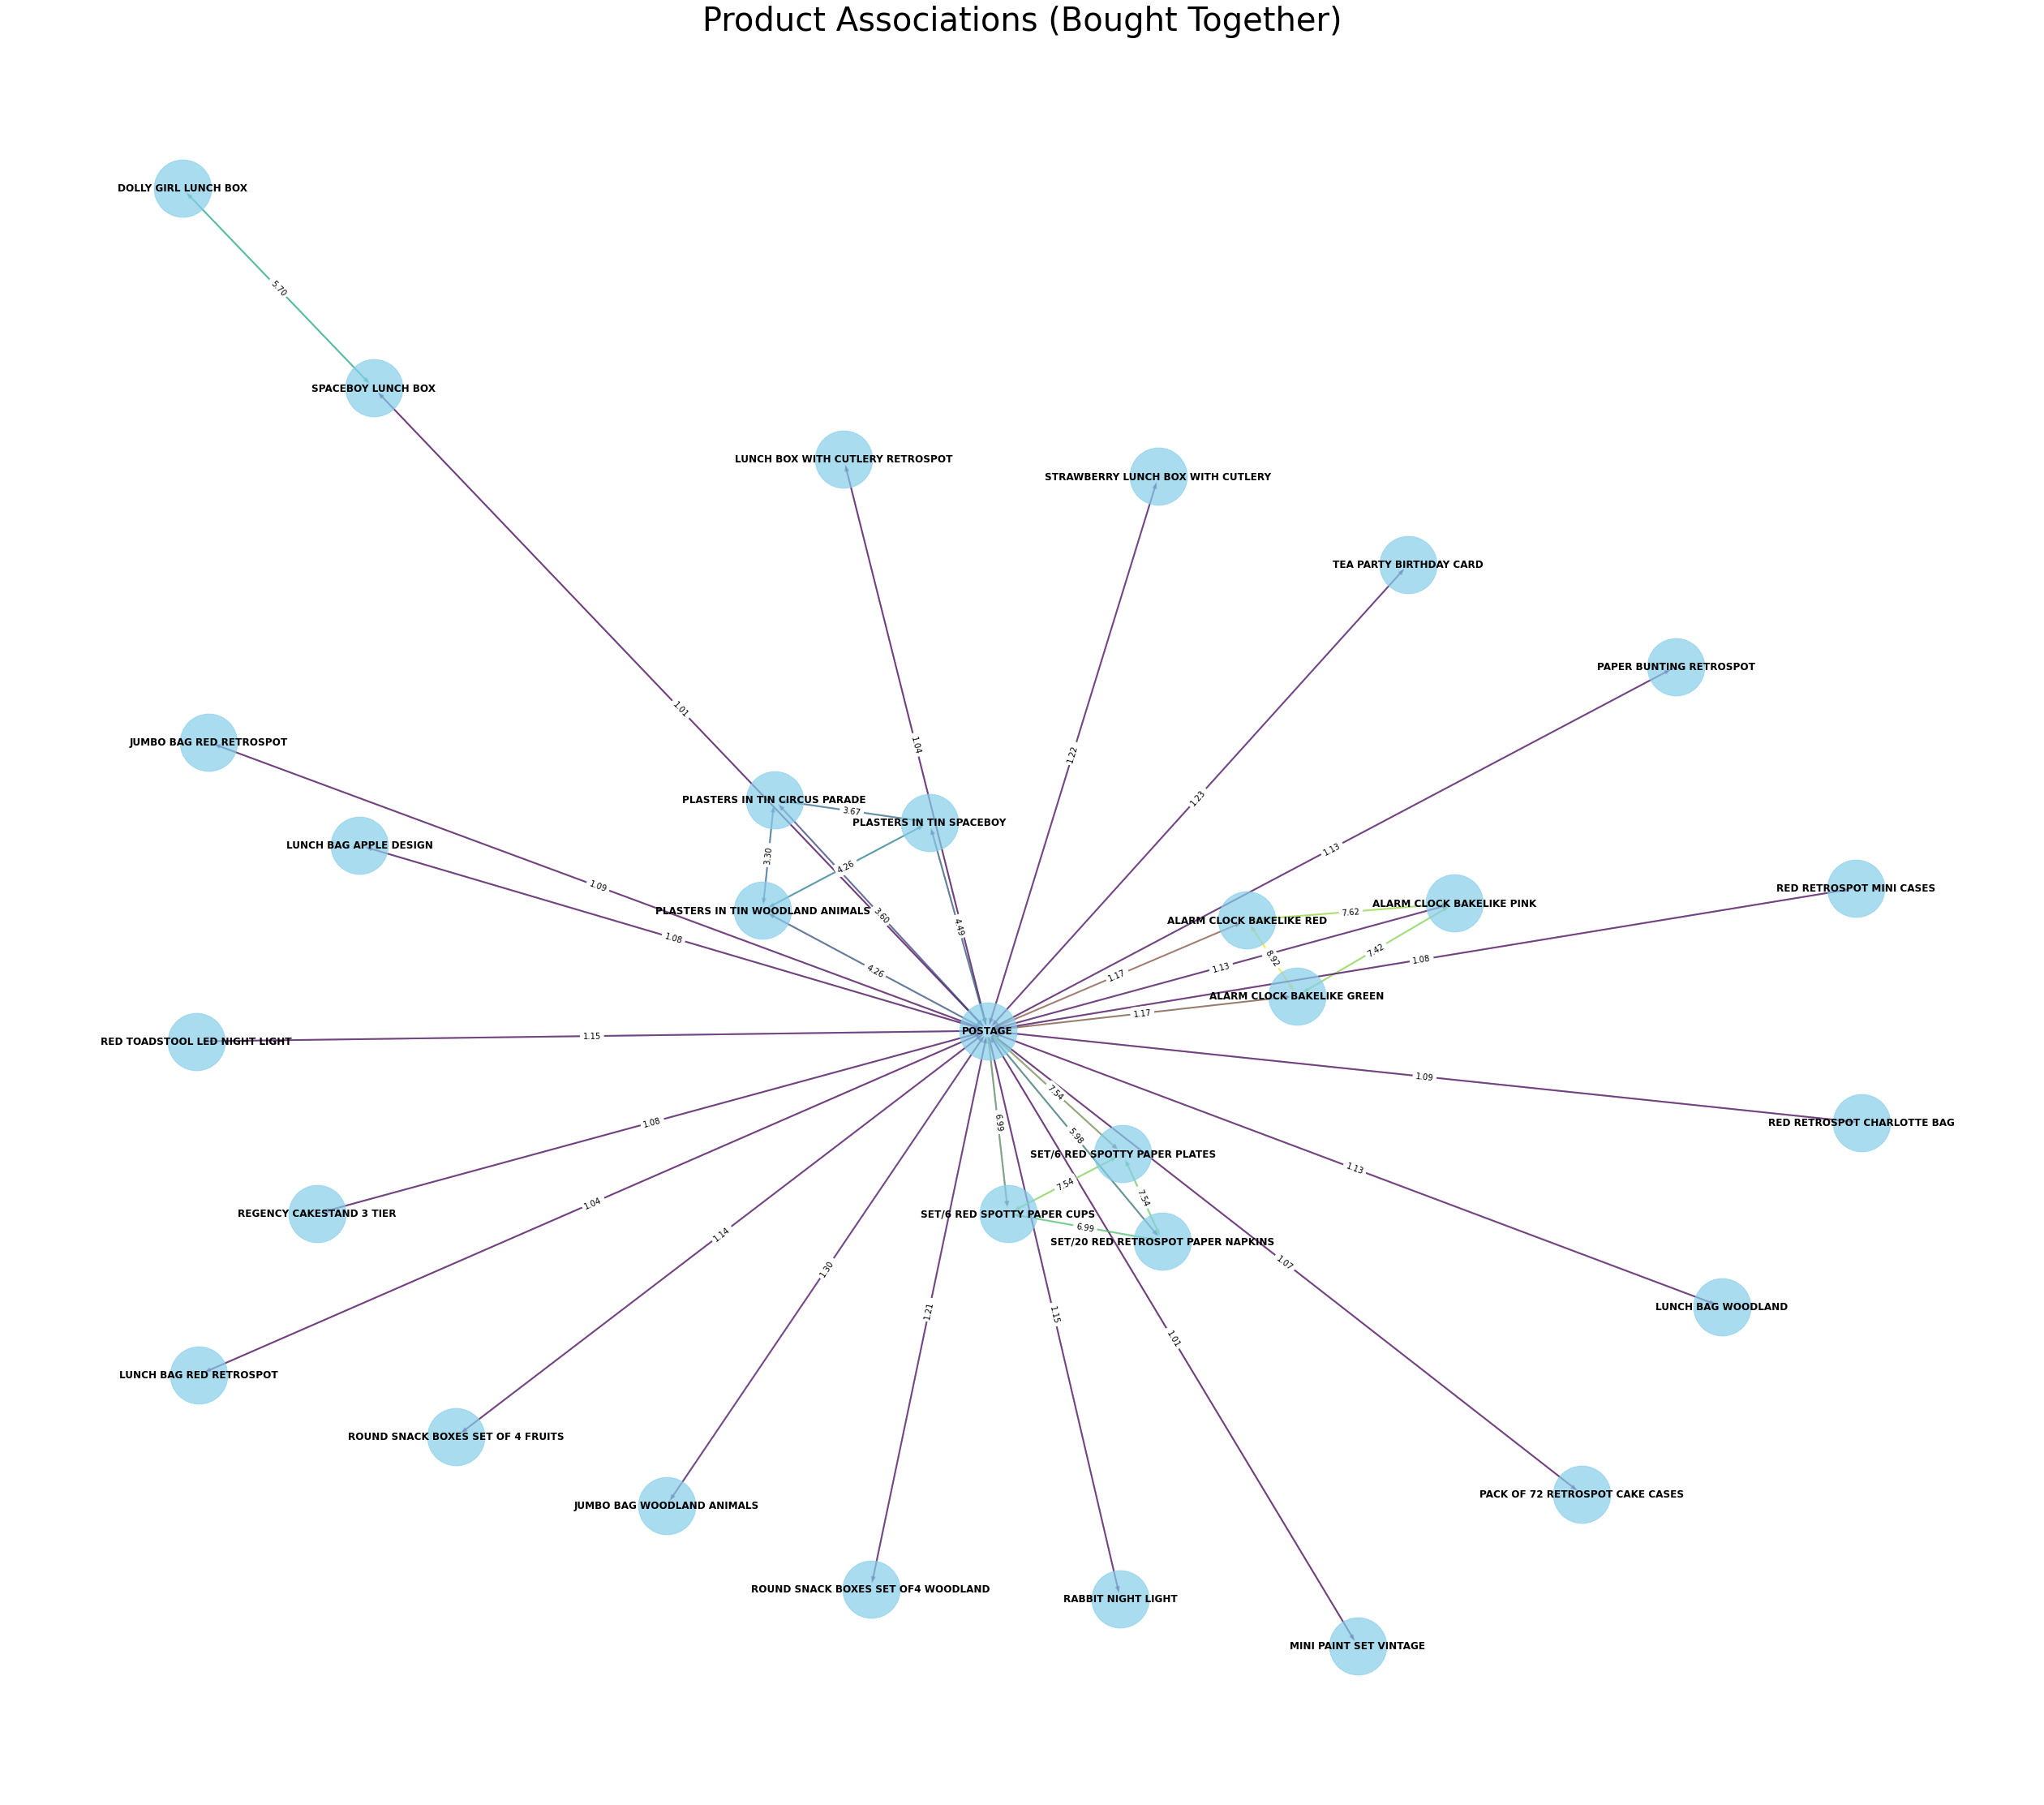

In [56]:

# Create an empty directed graph
G = nx.DiGraph()

# Add edges based on association rules
for _, rule in assoc_rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(antecedent, consequent, weight=rule['lift'])

# Plot the graph
plt.figure(figsize=(40,40),facecolor='white')

# Use spring_layout with additional iterations for better node separation
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw the nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color="skyblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color=[G[u][v]['weight'] for u, v in G.edges()])
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="black")

# Add edge labels (showing lift values)
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Add a title
plt.title('Product Associations (Bought Together)', fontsize=40)

# Show the graph
plt.axis('off')  # Turn off the axis
plt.show()
